In [1]:
#get some illustrative examples
import pickle
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import head_orientation_lib
reload(head_orientation_lib)
reload(saldat_head_orientation)

NameError: name 'saldat_head_orientation' is not defined

# Part 1, generate some selected example with 

In [97]:
dataset = 3
topic = 'sport'
dat = pickle.load(open('./data/saliency_ds{}_topic{}'.format(dataset, topic)))
#dat = 

In [70]:
t, v_list, smap = dat[120]#roller: 660~40.6, paris: ?~24.4, venise: 90~6.4, conan1: 380~23.8\
                        #4: 250~16, drive: 120~55.2, game: 120~8.2, sport: 120~24.44

vidname_dict = {'paris': 'paris.mp4', 'venise': 'venise.webm', 'roller': 'roller65.webm',\
               '0':'conan1.mp4', '4': 'surfing.mp4', '2': 'alien.mp4', '1': 'skiing.mp4',\
               'diving': 'diving.mp4', 'panel': 'panel.mp4', 'drive':'drive.mp4', 'game': 'game.mp4',\
               'sport':'sport.mp4'}
offset_dict = {'drive':48+0.24, 'panel':10+0.24, 'sport': 16+0.24, 'game': 0+0.24}
videoname = vidname_dict[topic]
offset = offset_dict.get(topic, 0)
print 'ffmpeg -ss {} -i {} -vframes 1 ./mmsys_fig/{}_{}.png'.format(t+offset, videoname, topic, t+offset)

ffmpeg -ss 8.2 -i skiing.mp4 -vframes 1 ./mmsys_fig/1_8.2.png


8.200000000000006
ffmpeg -ss 24.44 -i sport.mp4 -vframes 1 ./mmsys_fig/sport_24.44.png


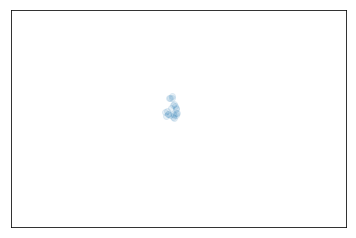

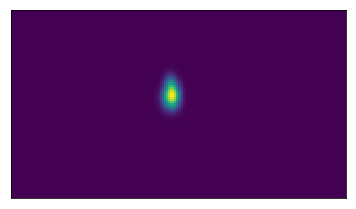

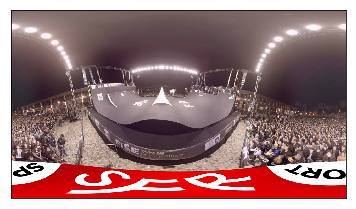

In [99]:

print t
pixel_list = saldat_head_orientation.HeadOrientation.pixellist_from_v_list(v_list)
pixel_list = head_orientation_lib.adjust_pixellist_dataset(dataset, pixel_list, head_orientation_lib.H, head_orientation_lib.W)
hi, wi = zip(*pixel_list)
plt.scatter(wi, hi, alpha=0.1)
plt.axis([0, head_orientation_lib.W, 0, head_orientation_lib.H])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
#plt.savefig('./mmsys_fig/fmap_{}_{}_{}.png'.format(dataset, topic, t), dpi=300)

plt.figure()
#smap = np.flipud(smap)
plt.imshow(smap)
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
#plt.savefig('./mmsys_fig/smap_{}_{}_{}.png'.format(dataset, topic, t), dpi=300)


#next, call this command in local computer 7040 to get the frame at time:
#then upload to server the frame image


plt.figure()
plt.imshow(plt.imread('./mmsys_fig/{}_{}.png'.format(topic, t+offset)))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

/glob/intel-python/versions/2018u1/intelpython2/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


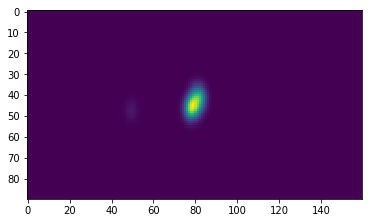

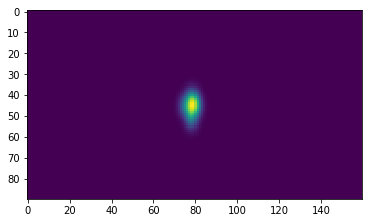

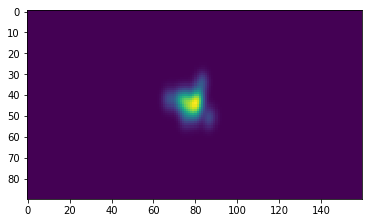

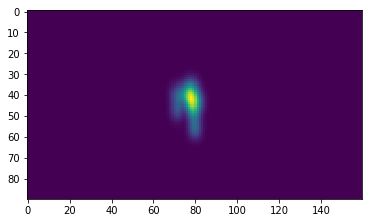

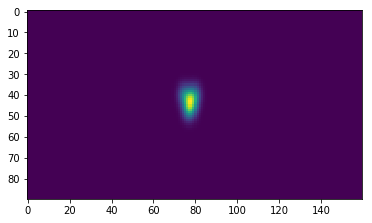

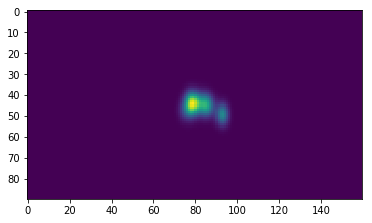

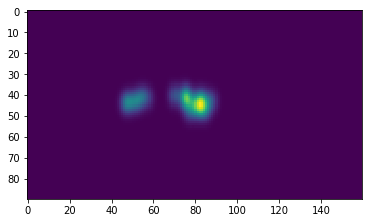

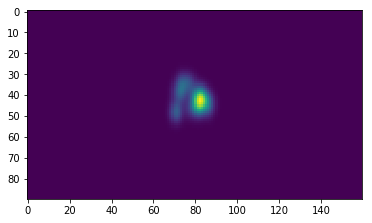

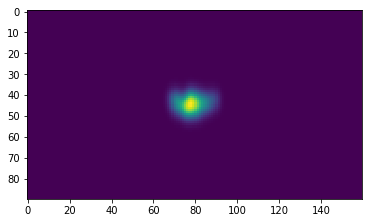

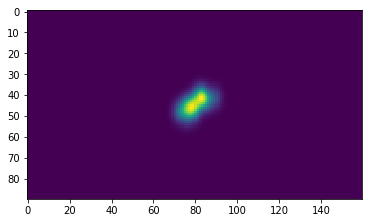

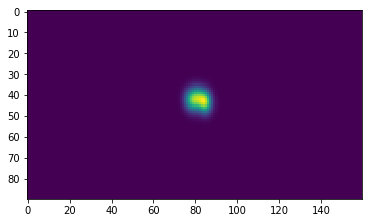

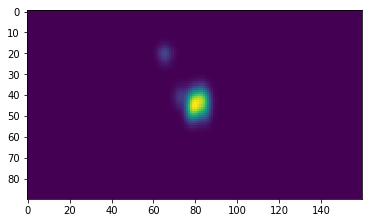

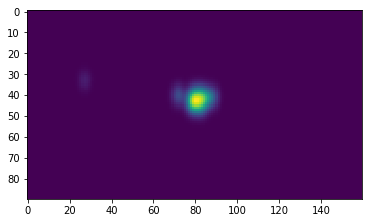

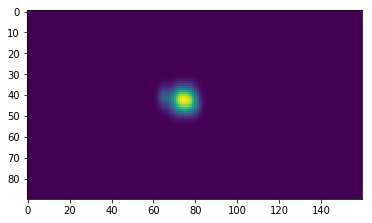

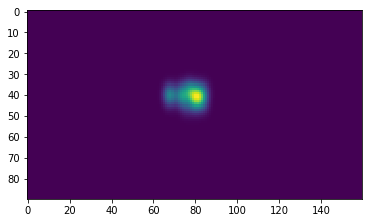

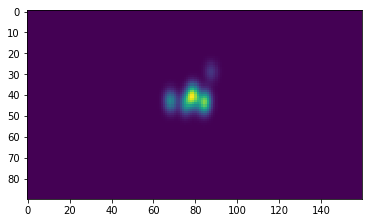

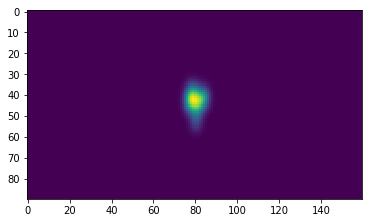

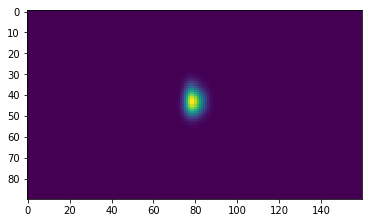

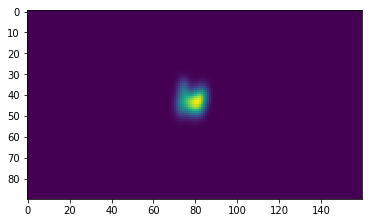

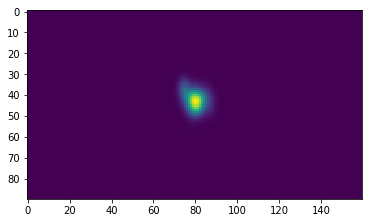

In [64]:
for i in np.arange(0, 800, 40):
    t, fmap, smap = dat[i]
    plt.imshow(smap)
    plt.figure()

# part 2, display head velocity and acceleration history of videos.

goal: display cutoff percentage: how much data is cutoff
goal: display median head movement speed, and median acceleration

In [171]:
reload(saldat_head_orientation)


<module 'saldat_head_orientation' from 'saldat_head_orientation.pyc'>

In [2]:
import numpy as np
import head_orientation_lib
import saldat_head_orientation
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
def get_velocity(vector_ds, uid, delta=10):
    #calculate velocity of just one users 
    result = []
    for idx, _ in enumerate(vector_ds[uid][:-delta]):
        t1, v1, _, _ = vector_ds[uid][idx]
        t2, v2, _, _ = vector_ds[uid][idx + delta]
        dt = t2 - t1
        dx = head_orientation_lib.angle_between(v1, v2)
        if dt <= 0.001:
            continue
        vel = dx*1.0/dt
        result.append([t1, dt, vel])
    return result

def get_acceleration(vel_ds, uid, delta=10):
    result = []
    for idx, _ in enumerate(vel_ds[uid][:-delta]):
        t1, _, vel1 = vel_ds[uid][idx]
        t2, _, vel2 = vel_ds[uid][idx + delta]
        dt = t2 - t1
        dvel = vel2 - vel1
        if dt <= 0.001:
            continue
        acc = dvel*1.0/dt
        result.append([t1, dt, acc])
    return result    

def get_velocity_ds(vector_ds, delta=10):
    vel_ds = []
    for uid,_ in enumerate(vector_ds):
        vel_list = get_velocity(vector_ds, uid, delta=delta)
        vel_ds.append(vel_list)
    return vel_ds

def get_acceleration_ds(vel_ds, delta=10):
    acc_ds = []
    for uid,_ in enumerate(vel_ds):
        acc_list = get_acceleration(vel_ds, uid, delta=delta)
        acc_ds.append(acc_list)
    return acc_ds    

def get_velocity_cum(vel_ds):
    #accumulate velocity from multiple users into a single list
    result = []
    for vel_list in vel_ds:
        for _, _, vel in vel_list:
            result.append(vel)
    return result

def get_acceleration_cum(acc_ds):
    result = []
    for acc_list in acc_ds:
        for _, _, acc in acc_list:
            result.append(acc)
    return result    



dirpath1 = u'./data/head-orientation/dataset1'
dirpath2 = u'./data/head-orientation/dataset2/Experiment_1'
dirpath3 = u'./data/head-orientation/dataset3/sensory/orientation'
ext1 = '.txt'
ext2 = '.csv'
ext3 = '.csv'
headoren = saldat_head_orientation.HeadOrientation(dirpath1, dirpath2, dirpath3, ext1, ext2, ext3)



generate data for dataset: 1, topic: paris
1 paris 16.86673306307844 9.016765015218509 0.3883970037453184 10.59420806909556 -0.3430120885521096
generate data for dataset: 1, topic: roller
1 roller 17.076776996847887 8.468049748937377 0.3692620026762776 11.224097213932797 -0.365242770169193
generate data for dataset: 1, topic: venise
1 venise 18.550129573003662 11.326366502146817 0.4271902267864345 12.280433844573661 -0.6407002695412101
generate data for dataset: 1, topic: diving
1 diving 18.081546348881457 11.95901299228393 0.4293453444125185 11.69932859304831 -0.7613004910060862
generate data for dataset: 1, topic: timelapse
1 timelapse 19.22374832092282 15.274888176331988 0.5121654818299699 11.169923793661425 -0.9213572625038424
generate data for dataset: 2, topic: 0


saldat_head_orientation.py:133: RuntimeWarning: divide by zero encountered in double_scalars
  v = theta * 1.0 / dt
saldat_head_orientation.py:138: RuntimeWarning: invalid value encountered in double_scalars
  dv = vec[idx][2] - vec[idx-dd][2]
saldat_head_orientation.py:133: RuntimeWarning: invalid value encountered in double_scalars
  v = theta * 1.0 / dt


2 0 33.09763292157104 6.183199589983817 0.3237901191886332 27.561572774908786 -0.21600288139862417
generate data for dataset: 2, topic: 1
2 1 40.57930478357057 9.276724976471225 0.38042946072602646 34.00634050498639 -0.38931516975916614
generate data for dataset: 2, topic: 2
2 2 54.69759170309342 6.557857401702683 0.32071948477573264 48.953872750032055 -0.30233050422295304
generate data for dataset: 2, topic: 3
2 3 34.66008741168498 7.207902367879535 0.3482575063338904 29.023411262631644 -0.17525014441510894
generate data for dataset: 2, topic: 4
2 4 41.68190616163326 11.316284172922575 0.42503048277016553 34.39686810273409 -0.36466118465123176
generate data for dataset: 2, topic: 5
2 5 115.56135466371893 7.356462823235362 0.36656247624095917 109.24760249865149 -0.19328124345789705
generate data for dataset: 2, topic: 6
2 6 79.70144418068129 2.2180363003472485 0.2174400630436759 75.47541806702118 -0.11595200349456855
generate data for dataset: 2, topic: 7
2 7 34.5195127962751 8.8711807

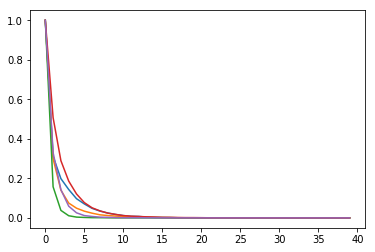

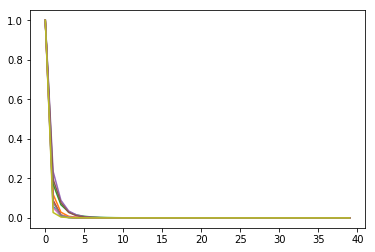

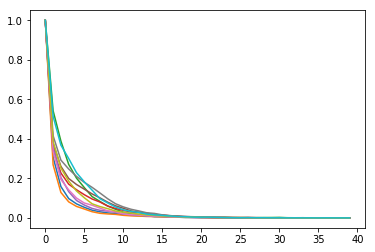

In [3]:

velcum_ds_dict = {}
acccum_ds_dict = {}
cutoff_ds_dict = {}

topic_dict = {saldat_head_orientation.HeadOrientation._DATASET3:['coaster2_', 'coaster_', 'diving', 'drive', 'game', 'landscape', 'pacman', 'panel', 'ride', 'sport'],\
             saldat_head_orientation.HeadOrientation._DATASET1:['paris', 'roller', 'venise', 'diving', 'timelapse'],\
              saldat_head_orientation.HeadOrientation._DATASET2:['0', '1', '2', '3', '4', '5', '6', '7', '8']
             }
for dataset in topic_dict:
    for topic in topic_dict[dataset]:
        print 'generate data for dataset: {}, topic: {}'.format(dataset, topic)
        vector_ds = headoren.load_vector_ds(dataset, topic)
        vel_ds = get_velocity_ds(vector_ds, delta=20)
        acc_ds = get_acceleration_ds(vel_ds, delta=30)
        vel_cum = get_velocity_cum(vel_ds)
        acc_cum = get_acceleration_cum(acc_ds)
        
        vel_cum_mean = np.mean([np.mean(vel_list) for vel_list in vel_ds])
        acc_cum_mean = np.mean([np.mean(acc_list) for acc_list in acc_ds])
        velcum_ds_dict[(dataset, topic)] = vel_cum
        acccum_ds_dict[(dataset, topic)] = acc_cum
        
        #vector_ds_dict[(dataset,topic)] = vector_ds
        vector_ds_cutoff = headoren.cutoff_vel_acc(vector_ds)
        len_cutoff = [len(vector_list) for vector_list in vector_ds_cutoff]
        len_ori = [len(vector_list) for vector_list in vector_ds]
        cutoff_ds_dict[(dataset, topic)] = (len_cutoff, len_ori)
        
        print dataset, topic, vel_cum_mean, np.median(vel_cum), 1-np.sum(len_cutoff)*1.0/np.sum(len_ori), acc_cum_mean, np.median(acc_cum)

        bars, bins = np.histogram(vel_cum, bins=40)
        plt.plot(bars*1.0/bars.max(), label=topic)
    plt.legend()
    plt.figure()

# count the number of valid saliency map in each datasets


In [4]:
import pickle
import numpy as np
import saldat_head_orientation

In [9]:
topic_dict = {saldat_head_orientation.HeadOrientation._DATASET3:['coaster2_', 'coaster_', 'diving', 'drive', 'game', 'landscape', 'pacman', 'panel', 'ride', 'sport'],\
             saldat_head_orientation.HeadOrientation._DATASET1:['paris', 'roller', 'venise', 'diving', 'timelapse'],\
              saldat_head_orientation.HeadOrientation._DATASET2:['0', '1', '2', '3', '4', '5', '6', '7', '8']
             }
for dataset in topic_dict:
    frame_count = 0
    for topic in topic_dict[dataset]:
        vid_frame_count = 0
        if topic == '6': continue#because it has 3 part
        dat = pickle.load(open('./data/bk/saliency_ds{}_topic{}'.format(dataset, topic)))
        for _, fmap, _ in dat:
            if fmap.sum() > 0:
                vid_frame_count += 1
        print dataset, topic, vid_frame_count
        frame_count += vid_frame_count
    print frame_count

1 paris 1305
1 roller 1134
1 venise 1216
1 diving 1268
1 timelapse 1120
6043
2 0 2718
2 1 3334
2 2 4862
2 3 2855
2 4 3412
2 5 2617
2 7 2729
2 8 4847
27374
3 coaster2_ 984
3 coaster_ 979
3 diving 983
3 drive 972
3 game 983
3 landscape 982
3 pacman 932
3 panel 980
3 ride 982
3 sport 956
9733


In [ ]:
1 paris 1305
1 roller 1134
1 venise 1216
1 diving 1268
1 timelapse 1120
6043
2 0 2718
2 1 3334
2 2 4862
2 3 2855
2 4 3412
2 5 2617
2 6 7504
2 7 2729
2 8 4847
34878
3 coaster2_ 984
3 coaster_ 979
3 diving 983
3 drive 972
3 game 983
3 landscape 982
3 pacman 932
3 panel 980
3 ride 982
3 sport 956
9733


#######OLD DATA
1 paris 1376
1 roller 1134
1 venise 1317
1 diving 984
1 timelapse 1151
5962
2 0 2720
2 1 3336
2 2 4868
2 3 2860
2 4 3412
2 7 2729
2 8 4851
24776
3 coaster2_ 984
3 coaster_ 984
3 diving 984
3 drive 984
3 game 984
3 landscape 984
3 pacman 984
3 panel 984
3 ride 984
3 sport 984
9840

In [13]:
vid6_framecounter = 0
for i in range(1, 4):
    dat = pickle.load(open('./data/bk/saliency_ds2_topic6_part{}'.format(i)))
    for _, fmap, _ in dat:
        if fmap.sum() > 0:
            vid6_framecounter += 1
print 6, vid6_framecounter

6 7504


## SHOW CASE of head movement velocity and acceleration extraction

In [5]:
dataset = 2
topic = '0'
vector_ds = headoren.load_vector_ds(dataset, topic)

In [6]:
uid = 3
vector_ds[3]
vel_ds = get_velocity_ds(vector_ds, delta=30)
acc_list = get_acceleration(vel_ds, uid, delta=30)

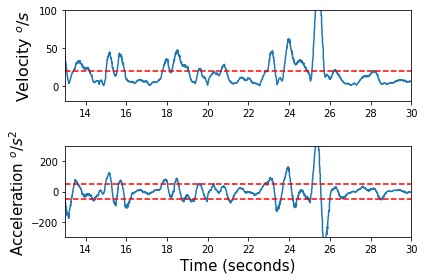

In [13]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

plt.subplot(2, 1, 1)
t, dt, vel = zip(*vel_ds[uid])
plt.plot(t, vel, label='velocity')
plt.axis([13, 30, -20, 100])
plt.axhline(y=20, color='r', linestyle='--')
#plt.title('Velocity')
#plt.xlabel('time (seconds)')
plt.ylabel('Velocity $^{o}/s$', fontsize=16)

plt.subplot(2, 1, 2)
t, dt, acc = zip(*acc_list)
t = np.array(t)
plt.plot(t+0.3, acc, label='acceleration')
plt.axis([13, 30, -300, 300])
plt.axhline(y=50, color='r', linestyle='--')
plt.axhline(y=-50, color='r', linestyle='--')
#plt.title('Acceleration')
#plt.tight_layout()
plt.xlabel('Time (seconds)', fontsize=15)
plt.ylabel('Acceleration $^o/s^{2}$', fontsize=15)

plt.savefig('./fig/ds_velaccthreshold.png', dpi = 300)

# SHOW case example of fixation maps

In [4]:
import pickle
import saldat_head_orientation
import head_orientation_lib

reload(saldat_head_orientation)
reload(head_orientation_lib)

from matplotlib import pyplot as plt
%matplotlib inline

dirpath1 = u'./data/head-orientation/dataset1'
dirpath2 = u'./data/head-orientation/dataset2/Experiment_1'
dirpath3 = u'./data/head-orientation/dataset3/sensory/orientation'
ext1 = '.txt'
ext2 = '.csv'
ext3 = '.csv'
headoren = saldat_head_orientation.HeadOrientation(dirpath1, dirpath2, dirpath3, ext1, ext2, ext3)



In [2]:

dataset = 2
topic = '1'
dat = pickle.load(open('./data/saliency_ds{}_topic{}'.format(dataset, topic)))

In [1]:

dirpath, filename_list, f_parse, f_extract_direction = headoren.load_filename_list(dataset, topic)




NameError: name 'headoren' is not defined

In [7]:
print dat[860][0]

52.600000000000044


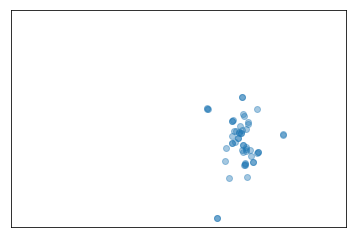

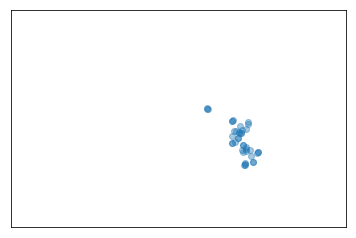

In [8]:

def show_fixlist(v_list, saved=False, filepath=''):
    pixel_list = saldat_head_orientation.HeadOrientation.pixellist_from_v_list(v_list)
    pixel_list = head_orientation_lib.adjust_pixellist_dataset(dataset, pixel_list, head_orientation_lib.H, head_orientation_lib.W)
    hi, wi = zip(*pixel_list)
    plt.scatter(wi, hi, alpha=0.4)
    plt.axis([0, head_orientation_lib.W, 0, head_orientation_lib.H])
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_visible(False)
    cur_axes.axes.get_yaxis().set_visible(False)
    
    if saved==True:
        plt.savefig(filepath, dpi=300)
    plt.figure()
t=52.6
v_list1 = headoren.get_fixation(vector_ds, t, filter_fix=False)
v_list = [item[1] for item in v_list1]
show_fixlist(v_list, saved=True, filepath='./mmsys_fig/fmap_{}_{}_{}_untiltered.png'.format(dataset, topic, t))
v_list1 = headoren.get_fixation(vector_ds, t, filter_fix=True)
v_list = [item[1] for item in v_list1]
show_fixlist(v_list, saved=True, filepath='./mmsys_fig/fmap_{}_{}_{}_filtered.png'.format(dataset, topic, t))

In [38]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


t, v_list, smap = dat[190]#roller: 660~40.6, paris: ?~24.4, venise: 90~6.4, conan1: 380~23.8\
                        #4: 250~16, drive: 120~55.2, game: 120~8.2, sport: 120~24.44
###
vidname_dict = {'paris': 'paris.mp4', 'venise': 'venise.webm', 'roller': 'roller65.webm',\
               '0':'conan1.mp4', '4': 'surfing.mp4', '2': 'alien.mp4', '1': 'skiing.mp4',\
               'diving': 'diving.mp4', 'panel': 'panel.mp4', 'drive':'drive.mp4', 'game': 'game.mp4',\
               'sport':'sport.mp4'}
offset_dict = {'drive':48+0.24, 'panel':10+0.24, 'sport': 16+0.24, 'game': 0+0.24}
videoname = vidname_dict[topic]
offset = offset_dict.get(topic, 0)
print t, offset
print 'ffmpeg -ss {} -i {} -vframes 1 ./mmsys_fig/{}_{}.png'.format(t+offset, videoname, topic, t+offset)    
####    
pixel_list = saldat_head_orientation.HeadOrientation.pixellist_from_v_list(v_list)
pixel_list = head_orientation_lib.adjust_pixellist_dataset(dataset, pixel_list, head_orientation_lib.H, head_orientation_lib.W)
hi, wi = zip(*pixel_list)
plt.scatter(wi, hi, alpha=0.4)
plt.axis([0, head_orientation_lib.W, 0, head_orientation_lib.H])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

#plt.savefig('./mmsys_fig/fmap_{}_{}_{}.png'.format(dataset, topic, t), dpi=300)

plt.figure()
plt.imshow(plt.imread('./mmsys_fig/{}_{}.png'.format(topic, t+offset)))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)


NameError: name 'dat' is not defined

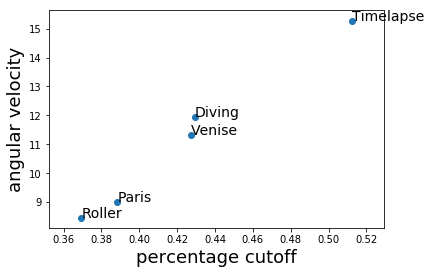

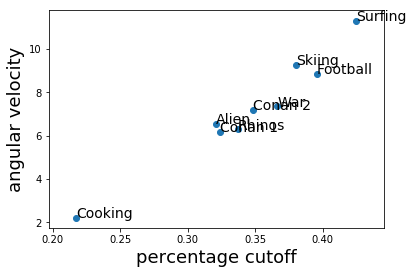

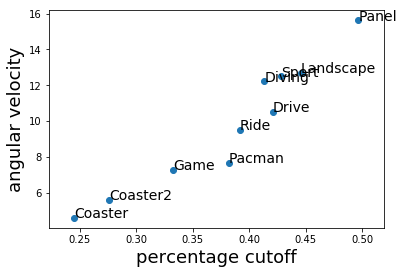

In [7]:
import numpy as np
med_vel = np.array([9.016765015218509, 8.468049748937377, 11.326366502146817, 11.95901299228393, 15.274888176331988, 6.183199589983817, 9.276724976471225, 6.557857401702683, 7.207902367879535, 11.316284172922575, 7.356462823235362, 2.2180363003472485, 8.87118078419093, 6.297938301486772, 5.602566768488104, 4.609649563964905, 12.226018070134783, 10.505671765783239, 7.270934005091194, 12.701710494714662, 7.678419117787785, 15.619421022332016, 9.523468902881987, 12.508252599303052])
ratio_cutoff = np.array([0.3883970037453184, 0.3692620026762776, 0.4271902267864345, 0.4293453444125185, 0.5121654818299699, 0.3237901191886332, 0.38042946072602646, 0.32071948477573264, 0.3482575063338904, 0.42503048277016553, 0.36656247624095917, 0.2174400630436759, 0.39563393808847047, 0.33719898910978596, 0.2756333333333333, 0.24493333333333334, 0.41352222222222224, 0.4209555555555555, 0.33234444444444444, 0.4460222222222222, 0.38174444444444444, 0.4968444444444444, 0.39184444444444444, 0.4282111111111111])
label_list = np.array(['Paris', 'Roller', 'Venise', 'Diving', 'Timelapse', 'Conan 1', 'Skiing', 'Alien', 'Conan 2', 'Surfing', 'War', 'Cooking', 'Football', 'Rhinos', 'Coaster2', 'Coaster', 'Diving', 'Drive', 'Game', 'Landscape', 'Pacman', 'Panel', 'Ride', 'Sport'])

def scatter_velcutoff(med_vel, ratio_cutoff, label_list, saved=False, savepath=''):
    plt.scatter(ratio_cutoff, med_vel)
    for i,_ in enumerate(label_list):
        plt.annotate(label_list[i], (ratio_cutoff[i], med_vel[i]), fontsize=14) 
    plt.xlabel('percentage cutoff', fontsize=18)
    plt.ylabel('angular velocity', fontsize=18)
    
    if saved==True:
        plt.savefig(savepath, dpi=300)
    
    plt.figure()

savetemplate='./mmsys_fig/eval_cutoff_dataset{}.png'
offset = np.arange(5)
scatter_velcutoff(med_vel[offset], ratio_cutoff[offset], label_list[offset], saved=True, savepath=savetemplate.format(1))
offset = np.arange(5, 14)
scatter_velcutoff(med_vel[offset], ratio_cutoff[offset], label_list[offset], saved=True, savepath=savetemplate.format(2))
offset = np.arange(14, len(label_list))
scatter_velcutoff(med_vel[offset], ratio_cutoff[offset], label_list[offset], saved=True, savepath=savetemplate.format(3))

/glob/intel-python/versions/2018u1/intelpython2/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


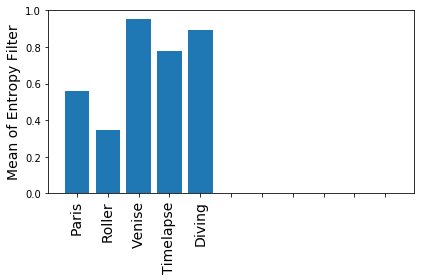

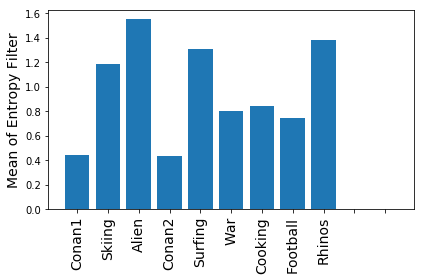

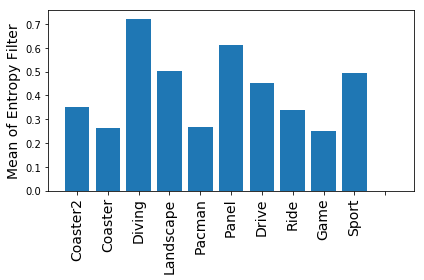

In [39]:
import numpy as np
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


def bar_entropylist(label_list, entropy_list, saved=False, filepath=''):
    #x = np.arange(len(entropy_list))
    #x = np.arange(11)
    x0 = len(label_list)
    for i in np.arange(len(label_list), 11):
        label_list = np.append(label_list, '')
        entropy_list = np.append(entropy_list, 0.0)
    x = np.arange(len(label_list))
    plt.bar(x, entropy_list, 0.8)
    plt.xticks(x, label_list,  rotation=90, fontsize=14)
    plt.ylabel('Mean of Entropy Filter', fontsize=14)
    
    if saved==True:
        plt.savefig(filepath, dpi=300)
    plt.figure()
    

#plot the filter entropy
label_list = np.array(['Paris', 'Roller', 'Venise', 'Timelapse', 'Diving', 'Conan1', 'Skiing', 'Alien', 'Conan2', 'Surfing', 'War', 'Cooking', 'Football', 'Rhinos', 'Coaster2', 'Coaster', 'Diving', 'Landscape', 'Pacman', 'Panel', 'Drive', 'Ride', 'Game', 'Sport'])
entropy_list = np.array([0.5572, 0.34668, 0.9526, 0.7792, 0.8917, 0.4389, 1.1869, 1.5482, 0.4343, 1.3036, 0.8014, 0.8396, 0.7456, 1.3792, 0.3498, 0.2647, 0.7233, 0.5036, 0.2657, 0.6106, 0.4528, 0.3385, 0.2524, 0.4921])

template = './mmsys_fig/eval_entrfilter_{}.png'
offset =np.arange(5)
bar_entropylist(label_list[offset], entropy_list[offset], saved=True, filepath=template.format(1))

offset =np.arange(5, 14)
bar_entropylist(label_list[offset], entropy_list[offset], saved=True, filepath=template.format(2))

offset =np.arange(14, len(label_list))
bar_entropylist(label_list[offset], entropy_list[offset], saved=True, filepath=template.format(3))